#### Note functions called in this notebook are actually stored in lyotLib.ipynb if this notebook is run locally please download lyotLib 
as well and and set the gitDirectory value to match your local copy of the tuning files.

### May 23-24 2022 UCoMP Filter thermal issues.

On May 23 2022 the batteries for the Cropico lyot filter therometer died.  Resulting in the filter misreporting tempatures as 31.115C instead of the noniamll ~34.5 C (each stage has a slightly differnet temp), but for a given crystal the temps remain farily hour to hour.  However these changes are enough that we activily correct the tuning phase to account for small variations (typically .01C) in the filter with time.

The >3C change in the fitler was not caught or corrected until May 25; so the data taken late May 23 and 24th have funky lyot filter tunings.

In this document we try to perdict what the actually tunings would have looked like with temps reported at  to 31.115.


In [1]:
import numpy as np
import matplotlib.pylab as plt
from pathlib import Path
%run lyotLib.ipynb

In [8]:
#
# Load config values from the calibration ini files
#
filterConfig637 = getFilterConfig("tuning_calibration_637.4.ini")
filterConfig670 = getFilterConfig("tuning_calibration_670.2.ini")
filterConfig706 = getFilterConfig("tuning_calibration_706.2.ini")
filterConfig789 = getFilterConfig("tuning_calibration_789.4.ini")
filterConfig1074 = getFilterConfig("tuning_calibration_1074.7.ini")
filterConfig1079 = getFilterConfig("tuning_calibration_1079.8.ini")

temp_meas = 36
offsets637 = []
offsets670 = []
offsets706 = []
offsets789 = []
offsets1074 = []
offsets1079 = []
# Compute expect offsets based on calibration ini files
for i in range(5):
    offsets637.append(filterConfig637["tempCof"][i]*(temp_meas-filterConfig637["tempRef"][i]))
    offsets670.append(filterConfig670["tempCof"][i]*(temp_meas-filterConfig670["tempRef"][i]))
    offsets706.append(filterConfig706["tempCof"][i]*(temp_meas-filterConfig706["tempRef"][i]))
    offsets789.append(filterConfig789["tempCof"][i]*(temp_meas-filterConfig789["tempRef"][i]))
    offsets1074.append(filterConfig1074["tempCof"][i]*(temp_meas-filterConfig1074["tempRef"][i]))
    offsets1079.append(filterConfig1079["tempCof"][i]*(temp_meas-filterConfig1079["tempRef"][i]))




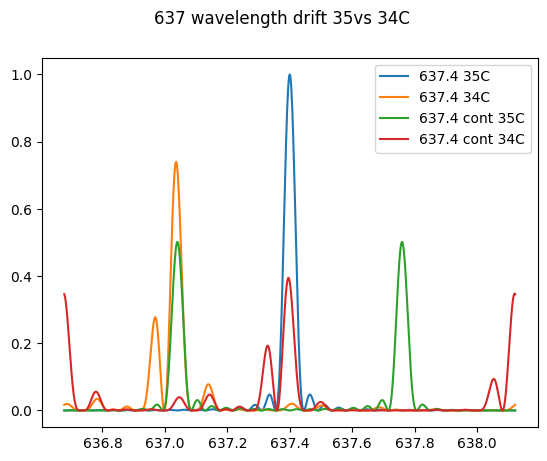

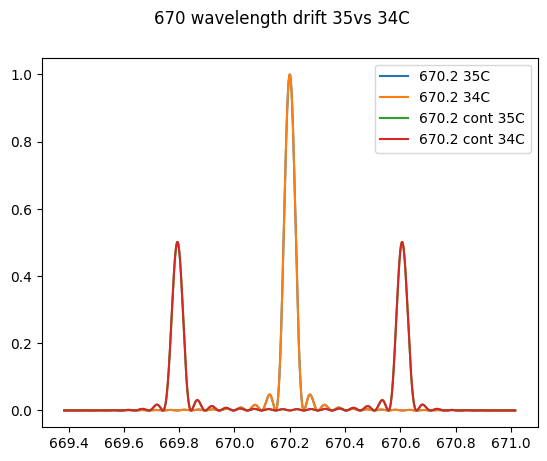

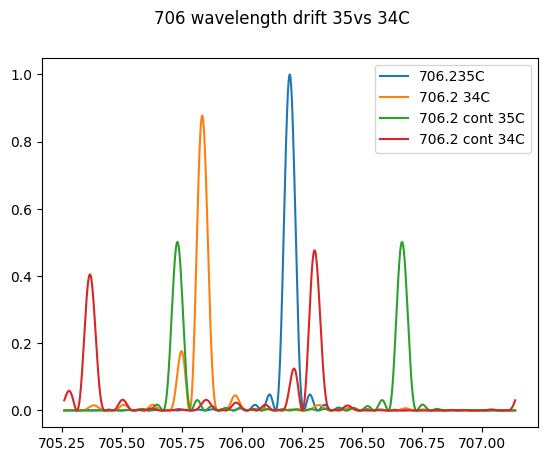

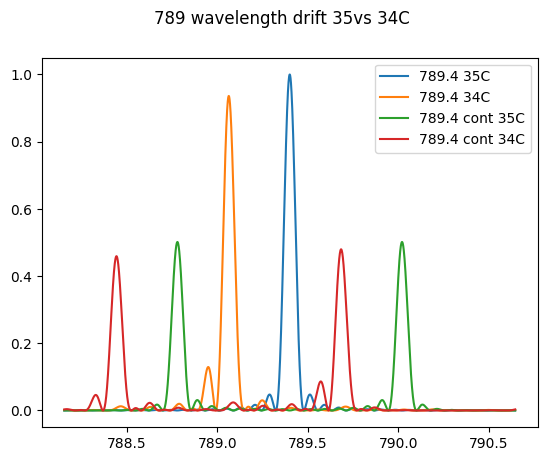

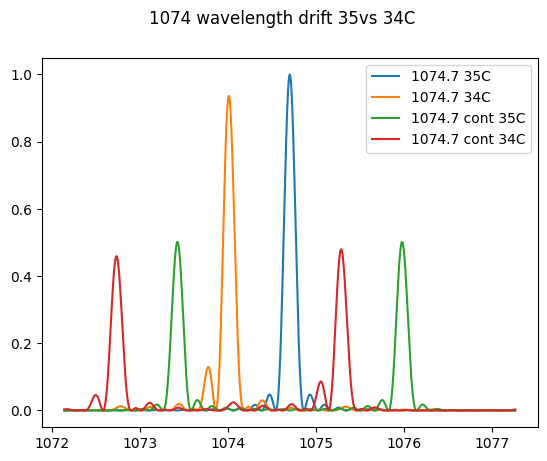

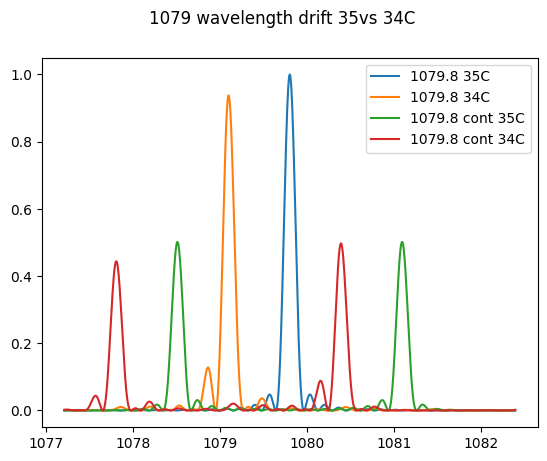

In [9]:
plt.plot(*createStages(filterConfig=filterConfig637,wavelength=637.4),label="637.4 35C")
plt.plot(*createStages(filterConfig=filterConfig637,wavelength=637.4,offsets=offsets637),label="637.4 34C")
plt.plot(*createStages(filterConfig=filterConfig637,wavelength=637.4,cam="offband"),label="637.4 cont 35C")
plt.plot(*createStages(filterConfig=filterConfig637,wavelength=637.4,cam="offband",offsets=offsets637),label="637.4 cont 34C")

plt.suptitle("637 wavelength drift 35vs 34C")
plt.legend()
plt.figure()
plt.plot(*createStages(filterConfig=filterConfig670,wavelength=670.2),label="670.2 35C")
plt.plot(*createStages(filterConfig=filterConfig670,wavelength=670.2,offsets=offsets670),label="670.2 34C")
plt.plot(*createStages(filterConfig=filterConfig670,wavelength=670.2,cam="offband"),label="670.2 cont 35C")
plt.plot(*createStages(filterConfig=filterConfig670,wavelength=670.2,cam="offband",offsets=offsets670),label="670.2 cont 34C")

plt.suptitle("670 wavelength drift 35vs 34C")
plt.legend()
plt.figure()
plt.suptitle("706 wavelength drift 35vs 34C")
plt.plot(*createStages(filterConfig=filterConfig706,wavelength=706.2),label="706.235C")
plt.plot(*createStages(filterConfig=filterConfig706,wavelength=706.2,offsets=offsets789),label="706.2 34C")
plt.plot(*createStages(filterConfig=filterConfig706,wavelength=706.2,cam="offband"),label="706.2 cont 35C")
plt.plot(*createStages(filterConfig=filterConfig706,wavelength=706.2,cam="offband",offsets=offsets789),label="706.2 cont 34C")

plt.legend()
plt.figure()
plt.suptitle("789 wavelength drift 35vs 34C")
plt.plot(*createStages(filterConfig=filterConfig789,wavelength=789.4),label="789.4 35C")
plt.plot(*createStages(filterConfig=filterConfig789,wavelength=789.4,offsets=offsets1074),label="789.4 34C")
plt.plot(*createStages(filterConfig=filterConfig789,wavelength=789.4,cam="offband"),label="789.4 cont 35C")
plt.plot(*createStages(filterConfig=filterConfig789,wavelength=789.4,cam="offband",offsets=offsets1074),label="789.4 cont 34C")

plt.legend()
plt.figure()
plt.suptitle("1074 wavelength drift 35vs 34C")
plt.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7),label="1074.7 35C")
plt.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7,offsets=offsets1074),label="1074.7 34C")
plt.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7,cam="offband"),label="1074.7 cont 35C")
plt.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7,cam="offband",offsets=offsets1074),label="1074.7 cont 34C")

plt.legend()
plt.figure()
plt.suptitle("1079 wavelength drift 35vs 34C")
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.80),label="1079.8 35C")
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.80,offsets=offsets1079),label="1079.8 34C")
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.80,cam="offband"),label="1079.8 cont 35C")
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.80,cam="offband",offsets=offsets1079),label="1079.8 cont 34C")

plt.legend()


Generally the thermal drift looks like a RED shift of all the tunings, with a small phaseshift between the crystals account for the less than 100% tranmission of the central peak in the 34C plots, and the small blue shifted tranmission lobe near both the onband and continum tunings.

For the most part the images taken on May 23 and 24 have very low signal and otherwise look bad.  This probally shouldn't be a supprise as we are mostly probing background (k corona) emission in both the onband and continumm images which subtract off to basicly zero.  

We do see some intersting promaince matieral in the 706 and 1079 data.  It is not clear what the 706 is probing but it looks like the 1079 data is red shifted into the wings of the HeI line and we get a strong signal in a prominace errupting May 24 in the NE.

For the 1079 data we have plotted below the approximate tramission profile of the prefilter as well as the expected tramission file from the 3 lyot filter tunings.

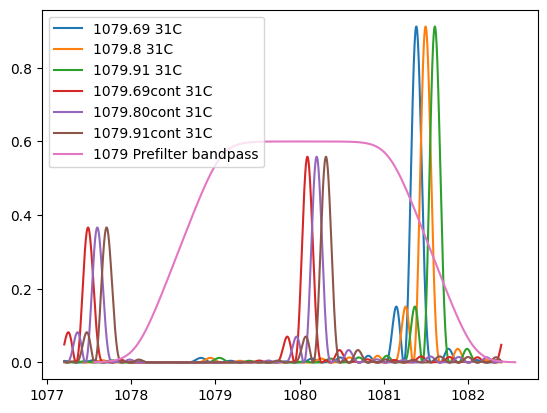

In [4]:
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.69,offsets=offsets1079),label="1079.69 34C")
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.80,offsets=offsets1079),label="1079.8 34C")
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.91,offsets=offsets1079),label="1079.91 34C")
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.69,cam="offband",offsets=offsets1079),label="1079.69cont 34C")
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.80,cam="offband",offsets=offsets1079),label="1079.80cont 34C")
plt.plot(*createStages(filterConfig=filterConfig1079,wavelength=1079.91,cam="offband",offsets=offsets1079),label="1079.91cont 34C")




## Prefilter band pass is a by eye fit to the accecptance data PDF it should 
## only be used as a rough guide.


def superGaus(x, a, b, alpha):
    y = np.log((np.cosh(2*alpha*np.pi*a)+np.cosh(2*alpha*np.pi*x))/(np.cosh(2*alpha*np.pi*b)+np.cosh(2*alpha*np.pi*x)))
    y = y/np.pi/alpha/6
    return(y)

x = np.arange(1000)/200-2.5
plt.plot(x+1080.06,superGaus(x,2,1,1.5)*1.8,label="1079 Prefilter bandpass")
plt.title = "1079 Tuning with temp reporting at 31.115"
plt.legend()

